In [2]:
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np

X.shape: (26, 2)


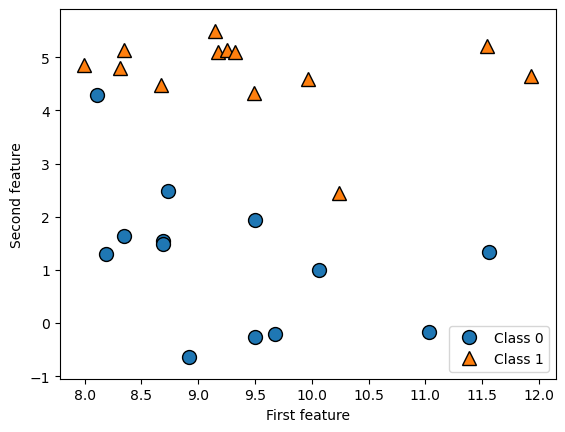

In [3]:
# we use 'forge' dataset to learn K-NN model
# generate forge
X,y = mglearn.datasets.make_forge()
# draw with forge
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

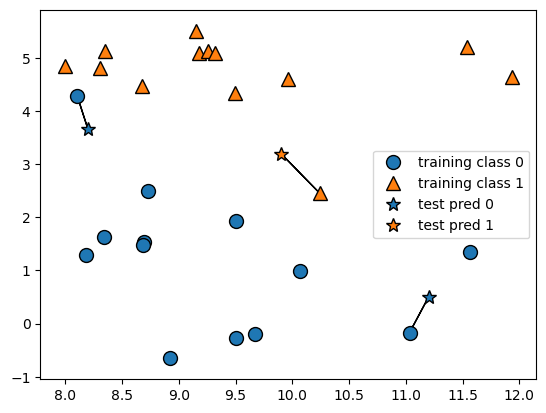

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

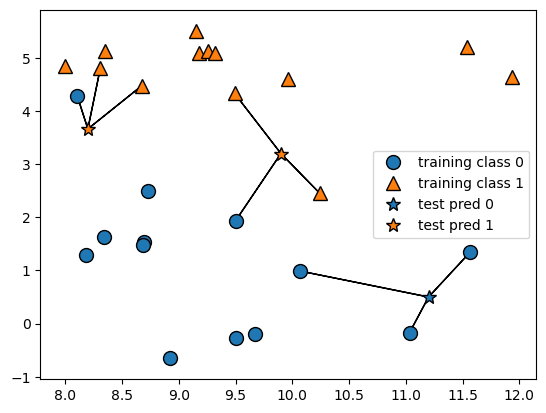

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [6]:
# apply knn with scikit-learn
# divide data into two parts train_set and test_data
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_train.shape: {}".format(y_train.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (19, 2)
X_test.shape: (7, 2)
y_train.shape: (19,)
y_test.shape: (7,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
prediction = clf.predict(X_test)
print("Test set prediction: {}".format(prediction))

Test set prediction: [1 0 1 0 1 0 0]


In [11]:
print("Test set accuracy: {:.2}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


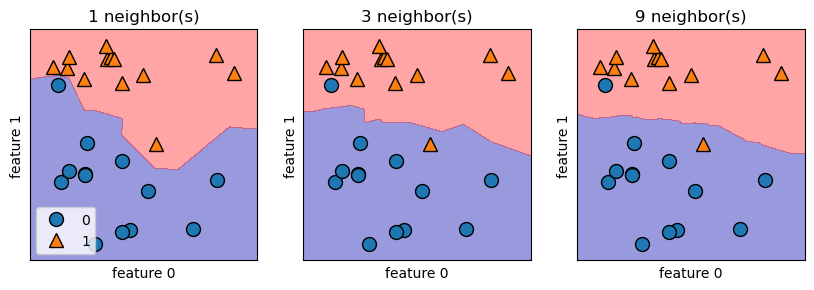

In [13]:
# analyse KNeighborClassifier
# we can visualise all the x,y data on the two-dimensional surface
# and we can see the decision boundary
#we set different n_neighbors and see the corresponding decision boundary
fig, axes =  plt.subplots(1,3, figsize=(10, 3))
# axes:包含子图轴对象的数组   plt.subplots(rows,column)
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

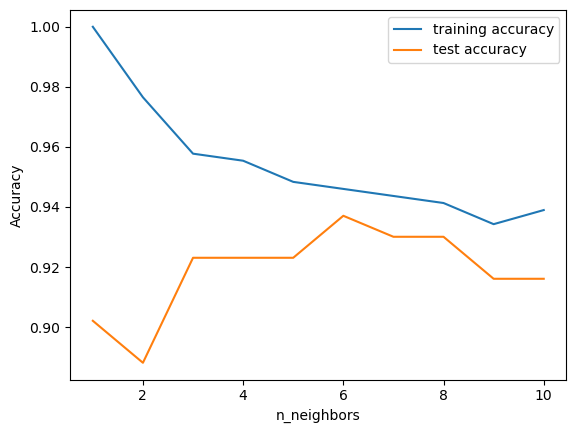

In [18]:
# based on cancer data to show the relation between complexity and generalization
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #build knn model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings,test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()